# Introduction to Coding for AI

Now that we have reached our final notebook where we implement a Machine Learning pipeline, it's a good moment to discuss a bit some fundamental concepts. We won't go too deep, but at least give some definitions to have a common understanding.

- **What is Artificial Intelligence?**

A formal definition describes it as *"Flexible rational agents that **perceive** their environment and take **actions** that **maximize** their chance of success at an arbitrary **goal**"* (S. Russell and P. Norvig).
The keywords here are perception, action, and goal. They tell us that our AI should have some kind of **body** to perceive and modify its environment, and a **brain** to process the perceived information and reason how to behave to achieve its goal.

- **What is Machine Learning?**

ML is the sub-field of AI concerned with helping computers to learn directly from data, rather than using human-made decision rules. There are ML algorithms that focus on the perception, action, or reasoning aspects of AI, so they are not necessarily complete AI agents, but components of them. Therefore, when you use ML you are also using AI, in the same sense as when you use a pulley you are using mechanical engineering.

- **What is the difference between AI/ML and Statistics?**

The relation between AI/ML and Statistics (and other areas of mathematics) is the same as the relation between Biology or Mechanical engineering and Statistics. Certainly, the higher-level fields make extensive use of statistics, and statisticians can become biologists or mechanical engineers if they wish so, but all three areas are different enough from each other to be a scientific field on their own. AI is concerned about its particular constraints for using statistical methods, and Statistics is concerned about general principles.

Now let's see how we can use these technologies in a concrete use case.

## 6. Training and evaluating models

Congratulations on reaching this final coding milestone! After completing this notebook, we will meet for a reflection session, and then it’ll be time for the final submission!

In this notebook, we’ll put together several components of the Python programming language along the end-to-end pipeline of your Machine Learning (**ML**) prototype. More concretely, you will pre-process a dataset, train an ML model and evaluate its output. The main idea is not only to do some number-crunching and predict values, but to try to understand the **processes** that generate your data, and its internal **structure**, then from this obtain **actionable** insights. By actionable, we mean insights that point to concrete decisions that generate value for your business. There is plenty of interesting information in data, so when wearing our *Data Scientist hats* our job is not only to extract it, but also to be selective. In other words, focus on obtaining information that gives you the most value by helping your business to make better decisions.

### Use case

To make our challenge more tangible, let's imagine a concrete use case that we'll be tackling along the notebook.
You are a data scientist working for the World Health Organization (WHO) and you are working on a project that wants to provide health services in very large cities with scarce health professionals. Particularly, you want to know if you can screen for people with a high risk of becoming diabetics by asking them a few questions about their body conditions, rather than having to ask them to go to the hospital to make a blood test.

For this, you have a dataset with body and blood measurements of a group of people and you know if they became diabetic a year later or not.
Your main question is whether you can use the body measurements to predict if they will become diabetic or not, with the same accuracy as when you use their blood measurements as well.
Once you analyze your data, and train and evaluate an ML model, you'll also have to document your results and make a presentation at a meeting with stakeholders.

For simplicity, let's say that the performance of your model is satisfactory if the accuracy of its predictions is above 0.95 (95% of the time its predictions are correct). Additionally, your model should not take more than 1 second to process a data point, otherwise, a large number of people may become impatient and stop using the app periodically.

If your results are satisfactory, they will create a mobile app that people can install on their smartphones, and after screening millions of people, the app will only ask those with a high risk of becoming diabetic to visit the hospital for a blood test. This will save resources and precious time from the scarce number of doctors available.
If your results are not satisfactory, meaning that there is clear evidence that the model can't solve the task, the program will be canceled.

Additionally, your results may also be inconclusive, meaning that there are indications that your model can solve the task, but the performance of your model is not satisfactory.
In this case, you will recommend investing in gathering more data to train again your model and increase its accuracy.

Finally, your model may be accurate enough but too slow. In this case, you'll have to find an alternative model that is faster, even if its accuracy is lower (but not below the accepted 0.95 threshold).

#### Important

In this notebook we won't repeat computations in every cell, so we'll only import modules, define variables, and load the data once. To avoid potential errors, always run the cells from top to bottom.
You can execute cells back and forth, just be careful that you don't override the value of variables unintentionally.
If your cell outputs start looking incoherent, you can always get a fresh start by clicking on the menu bar at the top of the notebook *Kernel* → *Restart & Run All* → *Restart and Run All Cells*.
Let's call these steps the *Kernel refresher procedure* (**KRP**).

It's good practice to run the KRP every time you finish the exercises in a notebook to make sure that all cells execute correctly.
For example, a common mistake happens when you define variable `X` in cell `1` and use it in cell `2`. If later you move the definition of `X` further down the notebook to cell `3`, then you will only notice an error in cell `2` if you run the KRP.
If a cell raises an error, the execution of the cells will stop there and the error message will tell you how to fix it.

### 6.1. Pre-process data

The first stage when you do ML is to inspect and prepare your data so that it's ready to train an ML model.
Sometimes, datasets don't have enough features to allow us to make a prediction, and then we need to combine multiple datasets. Other times, datasets have irrelevant features that we need to remove or have missing values that we need to decide how to fill in. All these tasks are part of data pre-processing.

Without further delay, let's get started!

**Note:** The following cell removes warning messages that are distracting for us, you can ignore it.

In [1]:
import warnings
warnings.filterwarnings('ignore')

#### 6.1.1. Load data

Now let's take a better look at our **Diabetes** [dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset). It has 442 measurements with **10 predictive features** and **1 target feature**:

- **Age** (in years)
- **Sex** (integer, 1 and 2)
- Body mass index (**BMI**)
- Average blood pressure (**BP**)
- Serum 1 (**S1**): Total serum cholesterol (tc)
- Serum 2 (**S2**): Low-density lipoproteins (ldl)
- Serum 3 (**S3**): High-density lipoproteins (hdl)
- Serum 4 (**S4**): Total cholesterol / HDL (tch)
- Serum 5 (**S5**): Possibly, log of serum triglycerides level (ltg)
- Serum 6 (**S6**): Blood sugar level (glu)
- Blood sugar level (**Y**) one year after baseline. This is the target feature.

Let's load it into the computer working memory (RAM):

In [2]:
import pandas as pd

data = pd.read_csv("../data/datasets/diabetes.csv").astype(float)

data

,Age,Sex,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


#### 6.1.2. Inspect data

For a first inspection, let's do some statistics on the features.
For this, we can use the method `.describe()` on the data frame to compute the minimum, maximum, mean, standard deviation, and percentiles of each feature.

In [3]:
data.describe()

,Age,Sex,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


Try to find interesting aspects in the table. For example, the values for *Sex* are 1 and 2, but their mean value is a little bit less than 1.5. This means that there are more instances of one sex than the other.

Next, let's check if any values are missing, in which case they would be assigned the value `Null` or `NaN` (*Not a Number*).

In [4]:
data.isnull().describe()

,Age,Sex,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442,442,442,442,442,442,442,442,442,442,442
unique,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False
freq,442,442,442,442,442,442,442,442,442,442,442


Great! There are only `False` values in all columns. The method `.isnull()` returns `True` for every missing value in the table, but we can see that `False` appears 442 times in all columns, meaning that there are no missing values in the table as each column has 442 rows.

#### 6.1.3. Clean data

Next, we’ll provide you with a plotting function called `plot_grid()` that allows you to observe distributions and correlations in your data.
But for this function to work, the column label must be numeric, with values between 0 and 1.
This is because we are fitting our features to distributions to visualize them more clearly, with a method called *kernel density estimation* (KDE).

In statistics, KDE is a non-parametric way to estimate a random variable's probability density function (PDF), which helps us better visualize our data distribution.
Don’t worry about the details, the main point is that you should transform your target variable to values between 0 and 1.
Are you still eager to find out more about KDE? If so then take a look at [this article](https://scikit-learn.org/stable/modules/density.html). Don't stay away too long though, we've got a milestone to complete. 😉

**Note:** Be careful not to confuse the term *Kernel* from statistics, with the term *Kernel* in your Jupyter Notebook, which refers to the programming language being run in your notebook (Python in our case).
They are the same word but have no relation to each other.

According to the [Centers for Disease Control and Prevention](https://www.cdc.gov/diabetes/basics/getting-tested.html) (CDC), the target glucose values `Y` are considered to be positive (`1`) for diabetes when they are 126 mg/dl or above, and all other values are considered to be negative (`0`).
Let's create a new column in our data frame called `Labels` with the class values `1` or `0`depending on the values of `Y`.

<img src="../data/content/diabetes_diagnostic.png" width="50%"/>

For our plotting functions, we'll use two libraries: `matplotlib` and `seaborn`.
They have methods to create all sorts of plots, figures, and statistical analyses to visualize and understand our data. Matplotlib has a rich toolbox to customize plots, and Seaborn works on top by making the visualizations more beautiful.
If you are curious, you can take a quick look at the introductory guides for [Matplotlib](https://matplotlib.org/stable/tutorials/introductory/quick_start.html) and [Seaborn](https://seaborn.pydata.org/tutorial/introduction.html) in their official documentation, but for now, it's enough that you are aware of their existence, as we'll cover them in more detail in another challenge for **data visualization**.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_grid(data_frame, label_column, font_scale=1):
    sns.set(font_scale=font_scale)
    grid = sns.PairGrid(data_frame, hue=label_column)
    grid.map_upper(sns.scatterplot)
    grid.map_diag(sns.histplot)
    grid.map_lower(sns.kdeplot, fill=True)
    grid.add_legend()
    plt.show()

Let's define the parameters that we'll use to plot the grid:

In [6]:
target_feature = "Y"
label_column = "Labels"
glucose_threshold = 126
positive = 1
negative = 0

In [7]:
# Create labels column with binary values:
data[label_column] = data.apply(
    lambda row: positive if (row[target_feature] >= glucose_threshold) else negative,
    axis=1
)

Now that we have pre-processed our data, let's **inspect it again** in more detail.

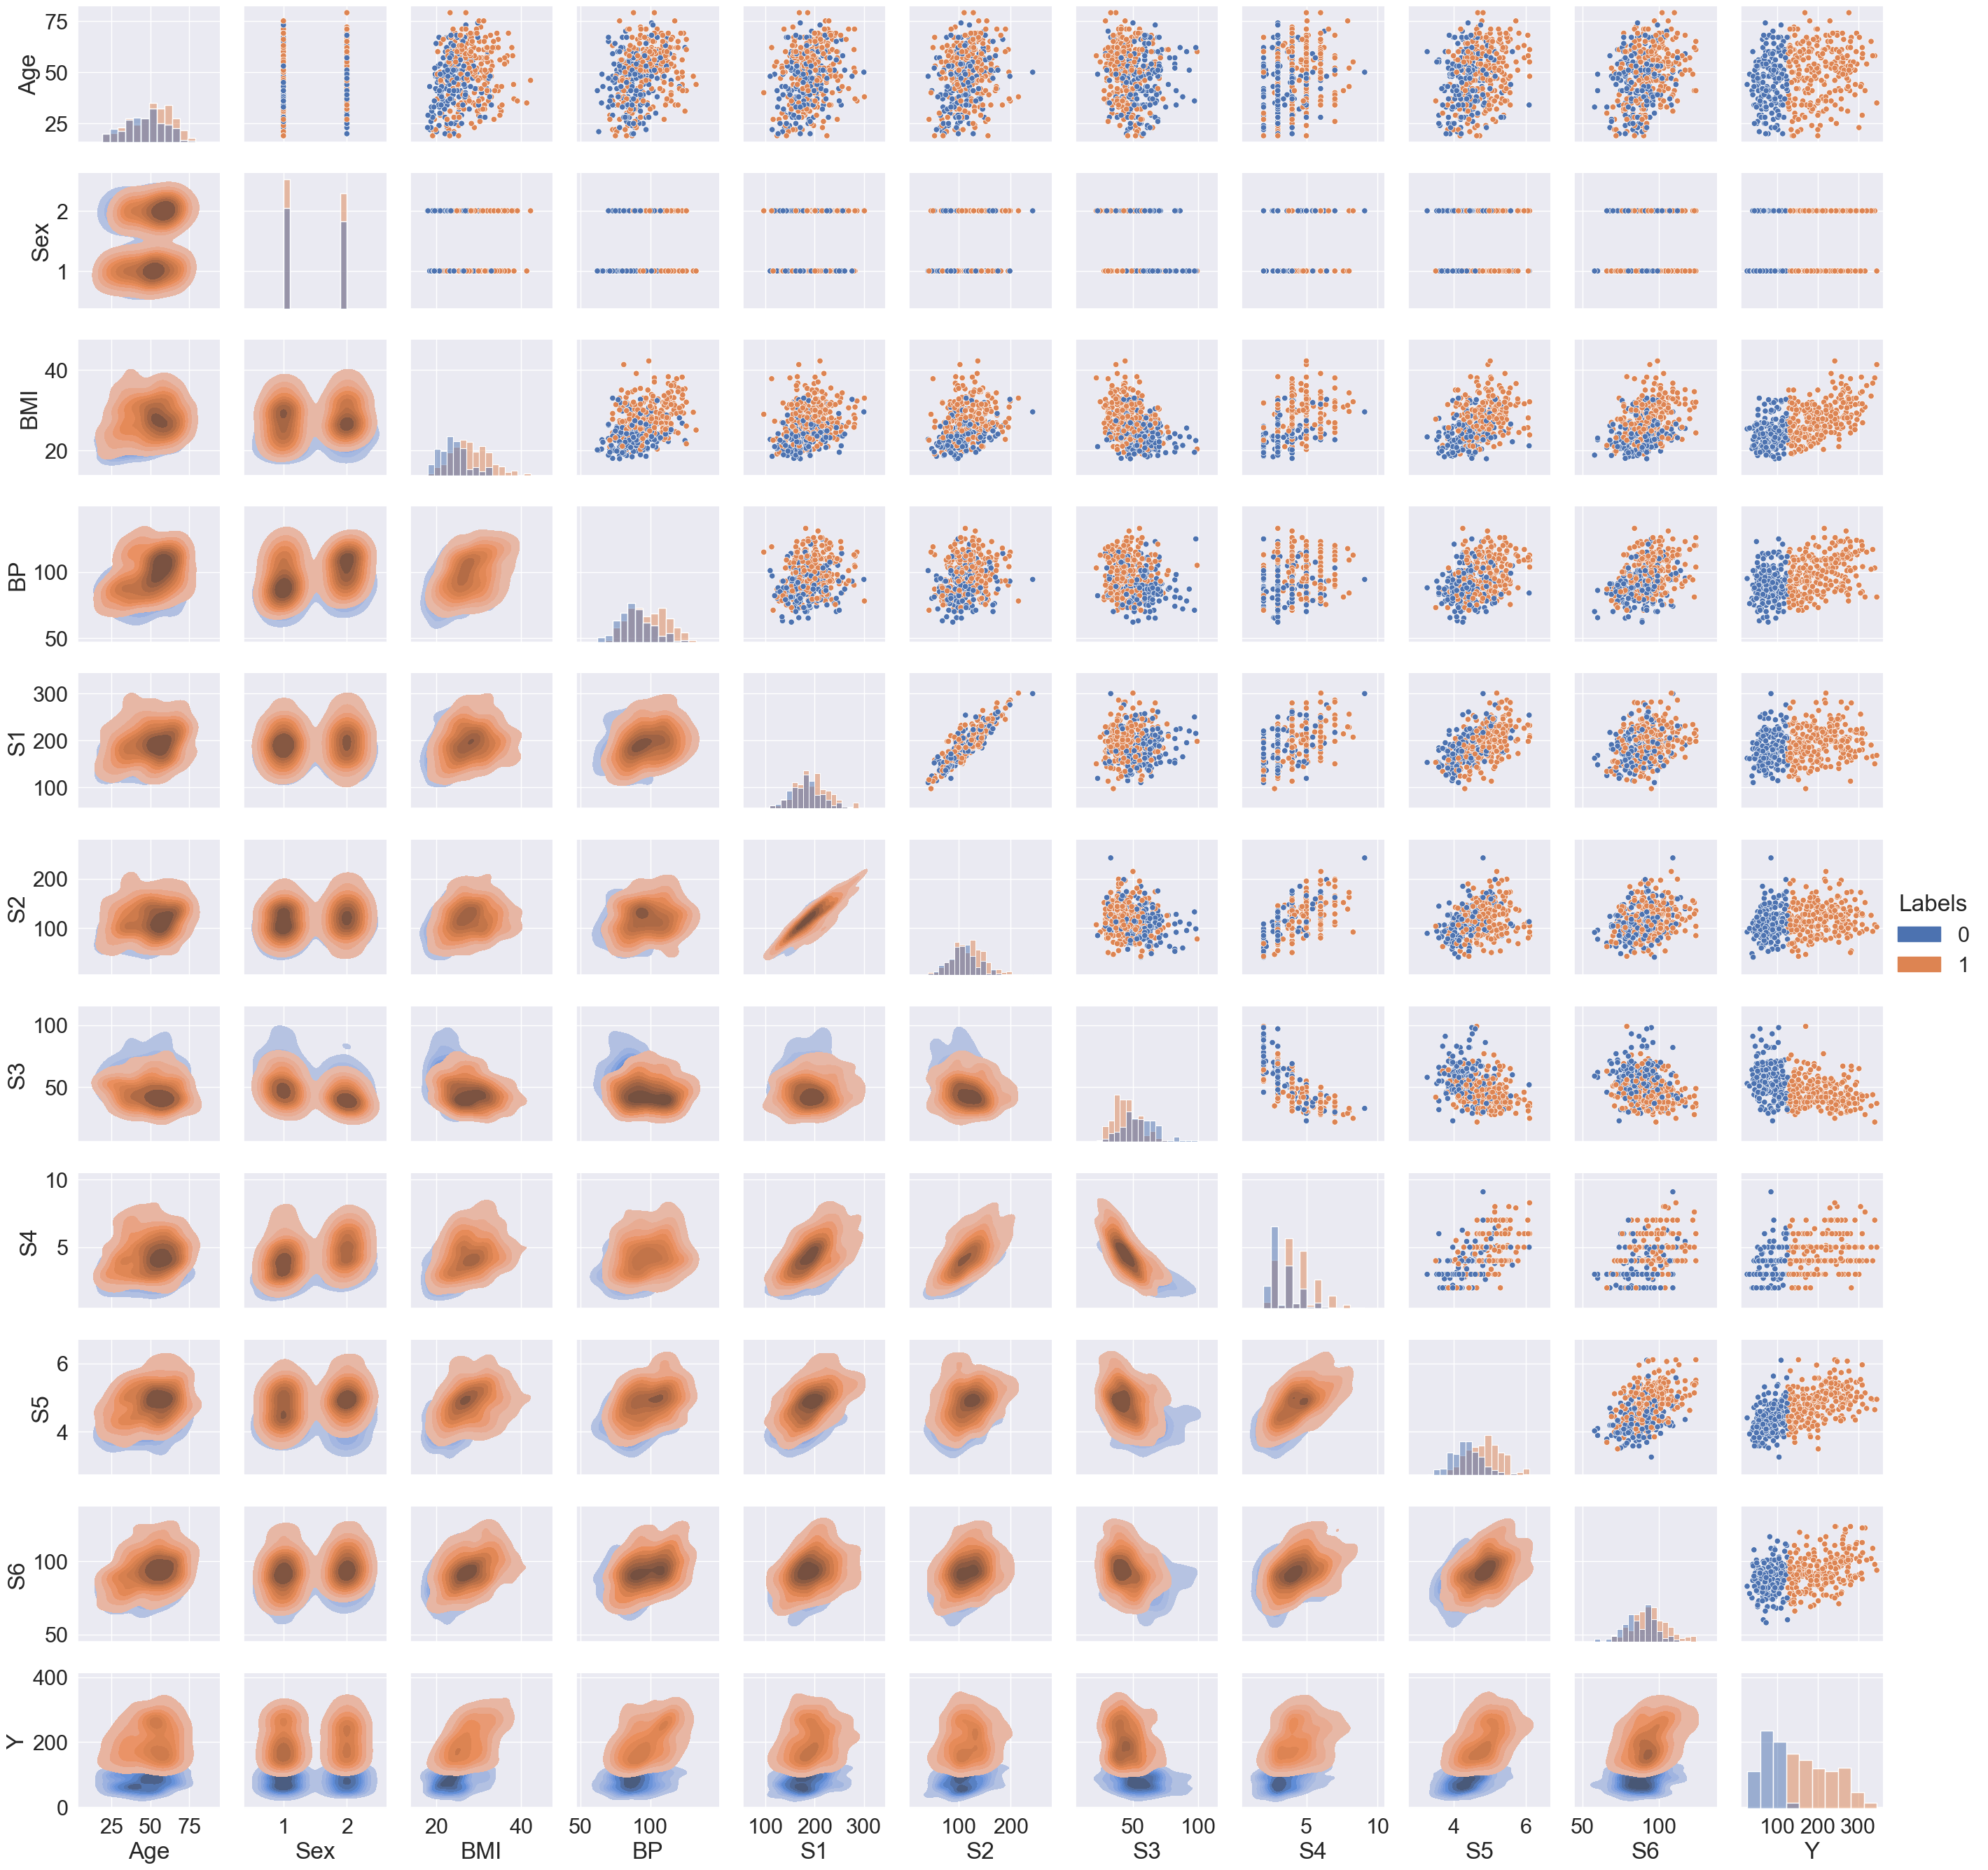

In [8]:
plot_grid(data, label_column, font_scale=2)

What a cool plot! 🤓 Let's dissect the information that it's showing us.

On the top-right corner, you can see scatter plots with all possible pairs between features, so each axis in a grid square is the value of a variable plotted against the other. The colors represent the class they belong to, so whether the person became diabetic (pink color) a year later or not (blue color). Remember? The label 1 = positive AKA diabetic, with a glucose level above the 126 mg/dl threshold, and 0 = negative.

In the diagonal going from the top-left to the bottom-right, we can see a histogram of each variable, with the colors again indicating the class that they belong to. Some are completely mixed, and some are a bit easier to segregate. Single features that are easier to segregate are more informative about the target feature. Which would you say are the most informative features?

Finally, the bottom-left corner mirrors the same information as in the top-right corner. The difference is that instead of directly plotting the values, each square plots a distribution fitted to the data.
These distributions can help to visualize whether the pair of features can separate the target feature or not. 

<img src="../data/content/plots_grid.png" width="90%"/>

Our objective in exploring these plots is to get a feeling of how much predictive power our data may have. For this, the main aspect to look for is correlations between variables, which would look like thin, long, diagonal ellipses. Correlations between features and the target are useful, as the higher the correlation, the higher the predictive power of that input feature to inform us about the value of the target feature. Features with predictive power are great, as they will help our ML model to perform better. 

Let’s inspect in more detail a smaller set of features to see if we can read the plots more clearly. For this, we’ll use the syntax to create a new data frame (`data_subset`) with only the specific columns that we want to plot. You access the data frame with a pair of square brackets `[]` and inside them, you provide a list with the names of the columns that you want to take. For example, let’s leave out the *serum* features.

Notice the syntax to create a new data frame (`data_subset`) with only the specific columns that we want to plot. You access the data frame with a pair of square brackets `[]` and inside them, you provide a list with the names of the columns that you want to take.

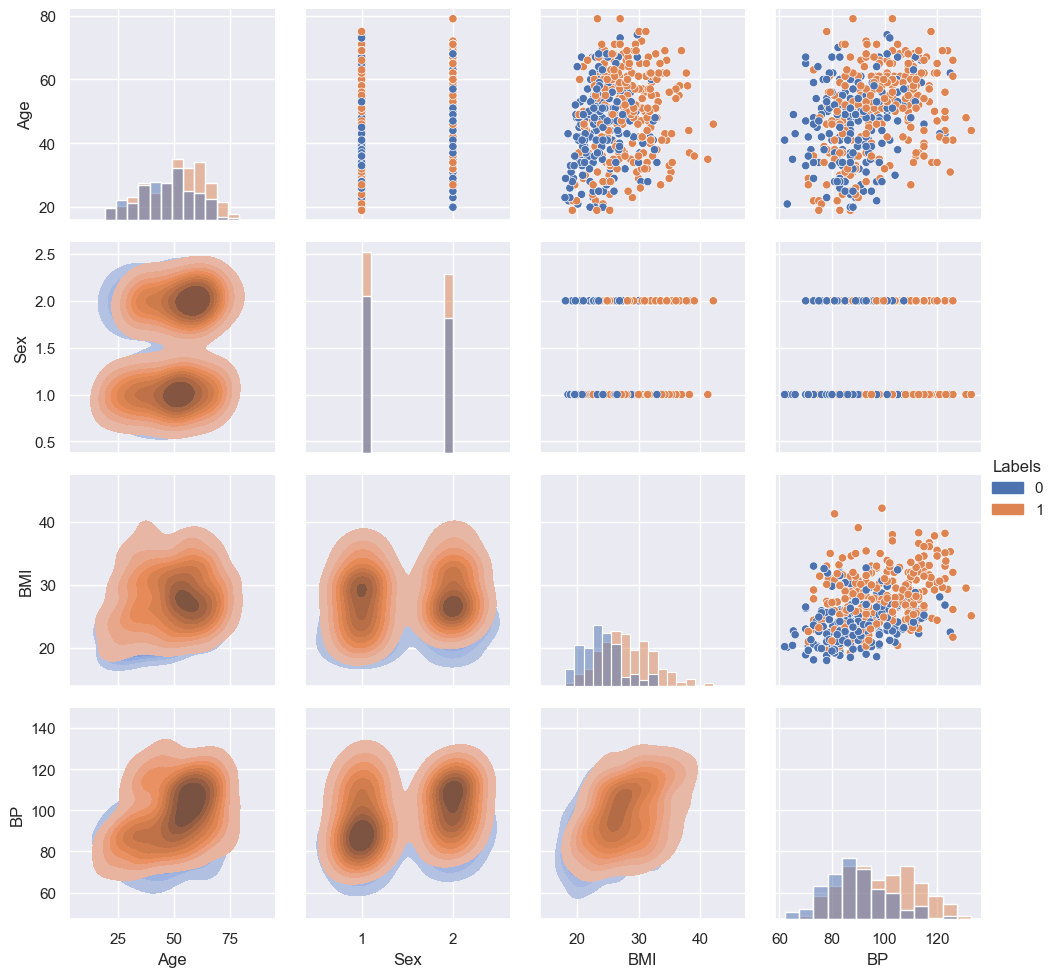

In [9]:
data_subset = data[["Age", "Sex", "BMI", "BP", label_column]]

plot_grid(data_subset, label_column)

Do you think that the body measurements look promising enough to predict the target feature?

#### 6.1.4. Split data

Our next pre-processing step is to split the data into the subset that we'll use to **train** our ML model and the subset that we'll use to **test** it.
We'll talk more about training and testing in a moment, for now, know that normally people use around **80%** of the data for training and **20%** for testing.
We can split our data into train and test sets with the help of a library called [**Scikit-Learn**](https://scikit-learn.org/).
This library has lots of [useful tools](https://scikit-learn.org/stable/getting_started.html) for processing data, loading ML models, and evaluating them.
One of these tools is a function called `train_test_split()`. You can tell this function what proportion of your data to use for training and what proportion to use for testing. As they are proportions, it takes values between 0 and 1 for each data subset, the only requirement is that both numbers add up to 1.

Ideally, you want to have thousands of data points, but in our case, we don't have that many (442 to be precise).
Therefore, a common practice is to use more data for training. We'll use 90% for training and 10% for testing.

In [10]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, train_size=0.9, test_size=0.1)

print(f"Train data has {len(train_data)} points.")
print(f"Test data has {len(test_data)} points.")

Train data has 397 points.
Test data has 45 points.


Currently, our input features are in the same data frame as the labels. Let's separate them.

In [11]:
target_feature = "Labels"

# dataframe.columns returns the names of the columns
input_features = list(data.columns)
input_features.remove(target_feature)
input_features.remove("Y")

print(f"\nName of the target feature:\n{target_feature}")
print(f"\nName of the input features:\n{input_features}")


Name of the target feature:
Labels

Name of the input features:
['Age', 'Sex', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']


In [12]:
X_train = train_data[input_features]  # Train instances
y_train = train_data[target_feature]  # Train labels

X_test = test_data[input_features]  # Test instances
y_test = test_data[target_feature]  # Test labels

Notice the convention in ML of naming the input features with an upper case **X** (like in `X_train` and `X_test`) and the labels with a lower case **y** (like in `y_train` and `y_test`). Input features are an array with multiple columns, or **dymensions**, so in linear algebra they're a matrix, and the target feature is a single column, or dimension, so in linear algebra it's a **vector**.
In linear algebra notation, matrices are represented with upper case letters and vectors with lower case letters, hence the ML convention.

### 6.2. Train the model

Now we have reached the stage where we train an ML model. But how do we teach computers to recognize patterns in our data?
We train a model in the same way we train ourselves to distinguish between different types of objects.
For example, imagine that you want to learn to distinguish between different types (**classes**) of trees that look similar.
The way to do it would be to spend some time looking at multiple examples (**instances**) of each tree so that you can start understanding the characteristics (**features**) that help you the most in distinguishing them.

Maybe you find out that a single feature, like the width of the trunk, is enough to help you to distinguish a tree from the others most of the time.
Or maybe you find out that only a combination of features, like the width of the trunk in combination with the height of the tree, is what helps you to distinguish a tree from the others most of the time.

Once you have found what combinations of feature values help you to distinguish between multiple trees, you may want to put your new skill to the test by attempting to classify photos taken from a botanical book you haven't seen before. Once you have identified the tree, you would most likely check the photo description in the book to see if you got it right.

This is the reason why we split our data into train and test sets, so that we are more confident of the performance of our model when we test it against ground truth data, meaning that we know the real class of each instance, but that the model didn't see during training. So let’s check how to do so with our diabetes dataset!

#### 6.1.5. Standardize data

It is a common requirement to standardize our data before using it to train an ML model.
This is because the accuracy of the model may decrease if the data isn't more or less normally distributed.
As a reminder, data points in a normal distribution (Gaussian) have **zero mean** and **unit variance**.

We only need to standardize the input features, but we don't need to standardize the labels, as they have to be passed as integers to the ML algorithms. For example, tree classes `1` and `2` should not be standardized as classes `-0.5` and `0.5`.

Going deeper into this topic is outside the scope of our challenge, but if you are curious about data standardization, you can find more information [here](https://datascience.stackexchange.com/questions/57953/what-is-the-purpose-of-standardization-in-machine-learning).
For now, let's import the module `StandardScaler` from Scikit-Learn and use it as follows:

In [13]:
from sklearn.preprocessing import StandardScaler

# Create instances of the scaler:
X_scaler = StandardScaler()

# Fit the scalers with the TRAIN data:
X_scaler.fit(X_train)

# Apply the scaler to the TRAIN and TEST data:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#### 6.2.1. Select model

The next question is what model to choose for the particular task that we are trying to solve.
The four main types are classification, clustering, regression, and dimensionality reduction.
- Classification: For example, when you want that a model tells you the class of a tree.
- Clustering: For example, when you show a model 1000 photos of trees, and you want it to tell you how many different types of trees are in the photos.
- Regression: For example, when you don't want that a model tells you the class (an integer number) of a tree, but the probability (a floating point number) that a tree belongs to a class.
- Dimensionality reduction: For example, when you want to classify a tree, maybe you are measuring 500 different features and you want that a model tells you the 5 most informative features.

In our case, we are interested in classifying body measurements to predict if a person will become diabetic.
There are many different types of classification models to choose from! How do you choose one? Scikit-Learn has a very nice [infographic](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) to help us.

<img src="../data/content/choose_model.png" width="100%"/>

#### 6.2.2. Train model

The map above is very helpful for real-life situations, you can always find it on the library website.
As we want to **classify** our input features into **diabetic** (`1`) or **not diabetic** (`0`), we'll start with **K-Nearest Neighbors**. This is a simple algorithm that often gives reasonable results and later we'll compare it with more sophisticated algorithms.

We won't dive into the theory behind these algorithms, as this is not part of our challenge objectives, but we'll take a look at the entire data-processing cycle to know its most important components.
Think of the ML code that you will see below as a recipe for processing your own data later on. This is your first contact with the topic, so we'll be treating some modules as **black boxes**. Rather, try to understand the big picture and how the components relate to each other.

To start, you can see that importing the algorithm and creating an instance of it follows the same procedure that you have already followed for instantiating other objects. The only new method below is `.fit()`. This method has the same name in all ML algorithms in the library and it trains a model.
As parameters, it takes the array with the input features `X` and the labels `y`.

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the model:
model_1 = KNeighborsClassifier()

# Fit the model with the TRAIN data:
model_1.fit(X_train_scaled, y_train)

KNeighborsClassifier()

#### 6.2.3. Optimize the model - Data

Wonderful, you have just trained your first ML model! There are some additional steps that you can take to ensure you are making the best out of your data.
We mentioned that we needed to randomly split it into training and testing datasets, but is there a difference in performance if we split it in different ways? Actually, yes! A common method to find a good split is called **K-Fold Cross Validation**. What it does, is randomly split a dataset into `K` parts, or *folds*, of the same size. Then, it uses one for testing and the remaining ones for training. Once it finishes, it takes another fold for testing and the remaining ones for training. This process is repeated until all folds were used for testing once. This way, we can find out which data partitioning gives the model the best performance. Clever, isn’t it? Take a look at the [diagram](https://scikit-learn.org/stable/modules/cross_validation.html) below:

<img src="../data/content/cross_validation.png" width="60%"/>

To perform cross-validation, we import the function `cross_validate()` and pass to it the model and the training data together with other parameters. Once it's done computing, it returns the scores that we asked it to measure. The important thing to look at is the **accuracy** and **F1-Score** metrics. Their values go from 0 to 1, and 1 would mean that the classification task is perfect, so the closer to 1 the better. There is no specific threshold considered the ideal one, it depends on the nature of the application and is up to the data scientist to decide it. For example, music recommendation is less strict than medical applications about the accepted minimum accuracy.

In [15]:
from sklearn.model_selection import cross_validate

scores = cross_validate(
    model_1,
    X_train_scaled,
    y_train,
    cv=10,
    scoring=["accuracy", "f1"],
    return_estimator=True
)


Average test Accuracy: 0.72 (0.07 std)

Average test F1-Score: 0.76 (0.06 std)


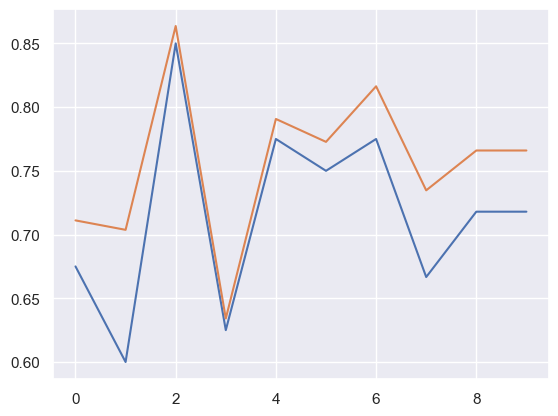

In [16]:
print(f'\nAverage test Accuracy: {scores["test_accuracy"].mean():.2f} ({scores["test_accuracy"].std():.2f} std)')
print(f'\nAverage test F1-Score: {scores["test_f1"].mean():.2f} ({scores["test_f1"].std():.2f} std)')

plt.plot(scores["test_accuracy"])
plt.plot(scores["test_f1"])
plt.show()

As the partitions are done randomly, every time you run the code it will show a different fold to be the one giving the best results. At the time of writing, we found a fold to be the best one, so we'll replace our initial model with it, but when you run the code, make sure you update `index_of_best_fold` to pick the fold with the best results **you** obtained.

In [17]:
index_of_best_fold = 1

model_1 = scores["estimator"][index_of_best_fold]

#### 6.2.4. Optimize the model - Hyperparameters

We just saw that you can optimize your model by manipulating the data you use to train it,  but you can also optimize it by exploring its **hyperparameters**.
Basically, all models have *parameters* and *hyperparameters*. Parameters are the values that store the information learned by the model to solve the task it's expected to perform. Hyperparameters are the characteristics of the model that determine how well, how much, or how fast it learns.
For example, in a neural network, the parameters are the strength of the connections between neurons and the hyperparameters are the number of neurons that you want to include in your model.

Hyperparameters are particular to each algorithm and we won't be modifying the default values of the models that we'll use. However, if you would like to explore further in this direction, you can inspect your model hyper parameters with the method `.get_params()` and choose the hyperparameters that you would like to optimize.

In [18]:
from pprint import PrettyPrinter
pp = PrettyPrinter()

print(f"\nmodel_1 parameters:\n")
pp.pprint(model_1.get_params())


model_1 parameters:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In our current example, let's optimize over the number of nearest neighbors and the Minkowski distance metric.
Again, don't worry about these details, just try to understand the overall intention and the general syntax for calling these methods.

In [19]:
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV
from time import time

# Parameters that we want to optimize:
n_values = [1, 2, 4, 8, 16]
p_values = [1, 2]
param_grid = {"n_neighbors": n_values, "p": p_values}


start_time = time()
searcher = HalvingGridSearchCV(
    estimator=model_1,
    param_grid=param_grid,
    cv=10,
)

searcher.fit(X_train_scaled, y_train)
end_time = time()

# Measure the time it took to search over the parameters grid:
time_lapsed = end_time - start_time

# Take the best performing model:
model_1 = searcher

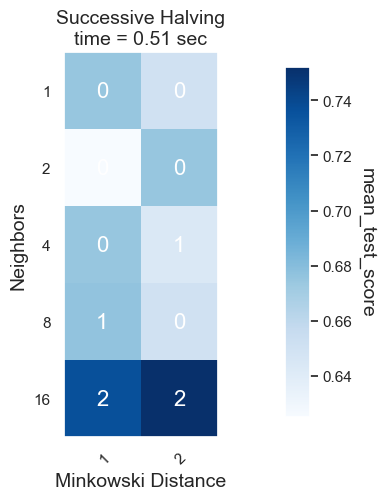

In [20]:
from library import plot_grid_search

plot_grid_search(searcher, n_values, p_values, time_lapsed)

In the plot above, you can see the grid of hyperparameters that we explored. On the vertical axis, we have the number of nearest neighbors that the model uses to decide the class of the new instance. On the horizontal axis, you see the Minkowski distance, which determines how you measure the distance between your data points. The important thing to see is that there are squares in the grid (combinations of parameters) that make the model perform better. In our current run, using 16 nearest neighbors and a Minkowski distance of 1 gave the best results. These values may vary when you run the code, as the data splits are random.

### 6.3. Evaluate the model

Our model is finally trained and optimized. Next, we’ll evaluate it with the **test** data. For this, we’ll measure its speed for processing data, and its accuracy for making predictions. 

#### 6.3.1. Measure speed

This measurement is quite straightforward. We simply want to know how long it takes the model to make a prediction. This is important as certain applications are time sensitive, like the time a user can wait when using a mobile app before feeling frustrated.
In our case, we know that our model should not take more than 1 second to compute each prediction, so let's measure it.

For this, we import the `time()` function from the `time` module in the Python Standard library.
It returns the number of seconds that have passed since a fixed date in the past (more concretely, since January 1, 1970, 00:00:00 (UTC)), so you can use it to measure a time-lapse as follows:

In [21]:
from time import time


start_time = time()

y_pred_1 = model_1.predict(X_test_scaled)

end_time = time()


# Round the value to have 3 decimal points (1/1000 of a second):
time_lapse = round(end_time - start_time, 3)

print(f"Time elapsed during model prediction: {time_lapse} seconds")

Time elapsed during model prediction: 0.002 seconds


As you can see, the speed for our model is great!

#### 6.3.2. Measure accuracy

Accuracy is a concrete evaluation metric but it's also used more generally to describe the correctness of the model output. There are different metrics that are used depending on the ML task. In our case we are performing classification, so we can use the Confusion Matrix and the Precision-Recall plots.

#### Confusion Matrix

The first visualization you'll see is the **[Confusion Matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)**. It doesn't refer to us being confused while looking at it (or does it? 😅), but to the number of instances that the model classified correctly or confused with another class.
It describes four important cases in classification:
- True Positives (**TP**): When an instance is correctly classified as the current class.
- True Negatives (**TN**): When an instance is correctly classified as another class.
- False Positives (**FP**): When an instance is wrongly classified as the current class.
- False Negatives (**FN**): When an instance is wrongly classified as another class.

[Here](https://commons.wikimedia.org/wiki/File:ConfusionMatrixRedBlue.png) is a visual explanation that also helps to get an intuition:

<img src="../data/content/confusion_matrix.png" width="30%"/>

For simplicity, we'll provide you with the plotting function `plot_confusion_matrices()` to evaluate your models.
It also displays the [balanced accuracy](https://scikit-learn.org/stable/modules/model_evaluation.html#balanced-accuracy-score), which is the average of recall scores per class or, for well balanced datasets, the score is equal to accuracy.

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay, balanced_accuracy_score

def plot_confusion_matrices(y_test, predictions_list, model_names):
    n_predictions = len(predictions_list)
    fig, axs = plt.subplots(ncols=n_predictions, figsize=(15, 5))
    
    for index, predictions in enumerate(predictions_list):
        ax = plt.subplot(1, n_predictions, index + 1)
        
        balanced_accuracy = balanced_accuracy_score(y_test, predictions)
        balanced_accuracy = round(balanced_accuracy, 2)
        
        ConfusionMatrixDisplay.from_predictions(
            y_test,
            predictions,
            ax=axs if (n_predictions == 1) else axs[index],
            cmap=plt.cm.Blues,
            colorbar=False,
        )
        ax.set_title(f"Confusion Matrix\n{model_names[index]}\nBalanced accuracy: {balanced_accuracy}", fontsize=14)
        plt.grid(False)
    
    
    print(f"")
    plt.show()

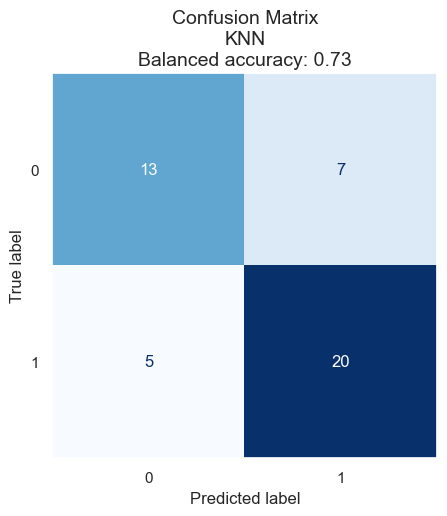

In [23]:
predictions_list = [y_pred_1]
model_names = ["KNN"]

plot_confusion_matrices(y_test, predictions_list, model_names)

We can see that the model is able to classify correctly most of the data, albeit having several instances of misclassification for each case (7 false negatives, 5 false positives). Confusion matrices also give us information about the properties of the training data. For example, if a class has many more errors than the other, this could indicate a class imbalance in the training dataset.

In general, when you collect your own data, try to collect about the same number of instances of each class. When you are using an existing dataset, explore it and count the number of instances in each class. If some classes have many more instances than others, you can simply remove them from the dataset before using it to train an ML model.

As an extreme example, if you have 999 instances of *class 1* and 1 instance of *class 2*, even the simplest classifier will reach almost perfect accuracy if it simply learns to always give *class 1* as the answer.

After evaluating our model, we see that 6 people were classified as high-risk, even though they were low-risk, and 8 people were classified as low-risk, even though they were high-risk. On the other hand, 23 people were correctly classified as high-risk. This means that our model is not perfect, but it's classifying most of the data points correctly (31 of 45, almost 70% correctly).

In this case, do you think the classes are imbalanced in our dataset?
is it more desirable that the model err on one class than the other?
If so, which is the better side to err on?

#### Precision-Recall

The next metric that we'll see is the **[Precision-Recall](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)** plot.

The *Precision* of class A, is the proportion of the instances correctly classified as class A, with respect to the total number of instances classified as class A.
In other words, if you identified 100 trees as Apple trees, how many of those are *really* Apple trees?

The *Recall* of class A,  is the proportion of the instances correctly classified as class A, with respect to the total number of instances that actually belong to class A.
In other words, if 100 apple trees are shown to you, how many of them did you correctly identify as apple trees?
In mathematical terms, you can compute and visualize them as follows:

$Precision = \frac{TP}{TP + FP}$

$Recall = \frac{TP}{TP + FN}$

A [visual](https://commons.wikimedia.org/wiki/File:Precisionrecall.svg) explanation always helps:

<img src="../data/content/precision_recall.png" width="90%"/>

We also provide you with the function `plot_precision_recall()` to evaluate your models. Let's see how well our current model does.

In [24]:
from sklearn.metrics import PrecisionRecallDisplay

def plot_precision_recall(models_list, X_test, y_test, model_names):
    n_models = len(models_list)
    fig, axs = plt.subplots(ncols=n_models, figsize=(15, 5))
    
    for index, model in enumerate(models_list):
        ax = plt.subplot(1, n_models, index + 1)
        
        PrecisionRecallDisplay.from_estimator(
            model,
            X_test,
            y_test,
            ax=axs if (n_models == 1) else axs[index],
        )
        ax.set_title(f"Precision-Recall\n{model_names[index]}")
        plt.grid(False)
    
    plt.show()

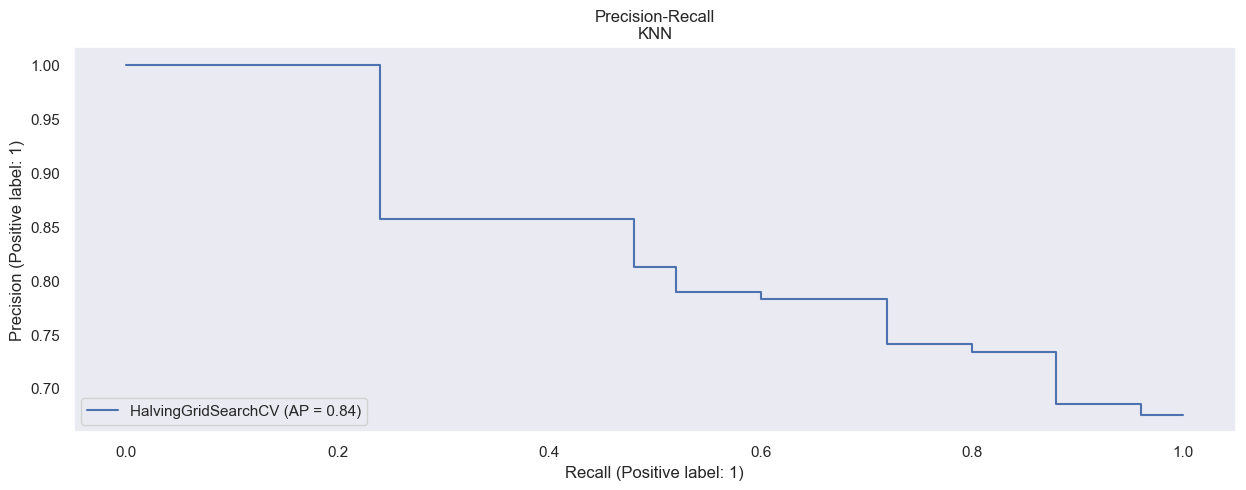

In [25]:
models_list = [model_1]
model_names = ["KNN"]

plot_precision_recall(models_list, X_test_scaled, y_test, model_names)

This *precision-recall* plot is particularly helpful to detect if a model performs well, even if it was trained with an imbalanced dataset. The curve shows the tradeoff between precision and recall for different classification thresholds. A high area under the curve (**AUC**) represents both, high recall and high precision.
This is the ideal case, as high precision indicates a low false-positive rate, and high recall indicates a low false-negative rate.

In our current case, we see that the Average Precision (**AP**) is 0.85, but when we reduce the decision threshold to recall more than 90% of the classes, the AP goes down closer to 0.5. This makes sense, as we have two classes, and choosing randomly between them would give us an AP of 0.5.

We have reached the end of our ML prototype! We have selected, trained, optimized, and evaluated an ML model to make predictions on the Diabetes dataset. The remaining task is to create additional models and compare them against each other.

### 6.4. Compare the model

In this last section we'll create additional models using different ML algorithms.
The purpose is to compare their accuracy *out of the box* against our optimized model, so we **won't optimize** the new models.

To make things a bit easier, we'll show you how to create data-processing pipelines that simplify your code and make it safer.
In pipelines, you can bundle the pre-processing steps together with the ML steps, so that there is no risk that you may preprocess data differently in different places. Take a look at the next cell and see how little code we need to pre-process, train, and test not one, but three different models!

#### 6.4.1. Train other models

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Import 3 ML algorithms:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Create instances of the models:
model_2 = DecisionTreeClassifier()
model_3 = MLPClassifier()
model_4 = SVC()

# Create the pipelines with the data scaler and the model,
# and fit them with the TRAIN data: 
model_2 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
).fit(X_train, y_train)

model_3 = make_pipeline(
    StandardScaler(),
    MLPClassifier()
).fit(X_train, y_train)

model_4 = make_pipeline(
    StandardScaler(),
    SVC()
).fit(X_train, y_train)

# Test the models with the TEST data:
# Notice that you don’t need to scale it as the scaler is part of the pipeline!
y_pred_2 = model_2.predict(X_test)
y_pred_3 = model_3.predict(X_test)
y_pred_4 = model_4.predict(X_test)

#### 6.4.2 Contrast all models

So how do we compare our models? Two good comparative aspects are the confusion matrix and the precision-recall curve. Without further ado, let’s compute the confusion matrices and the precision-recall curves for each of our four models, and then display them side by side to analyze them.

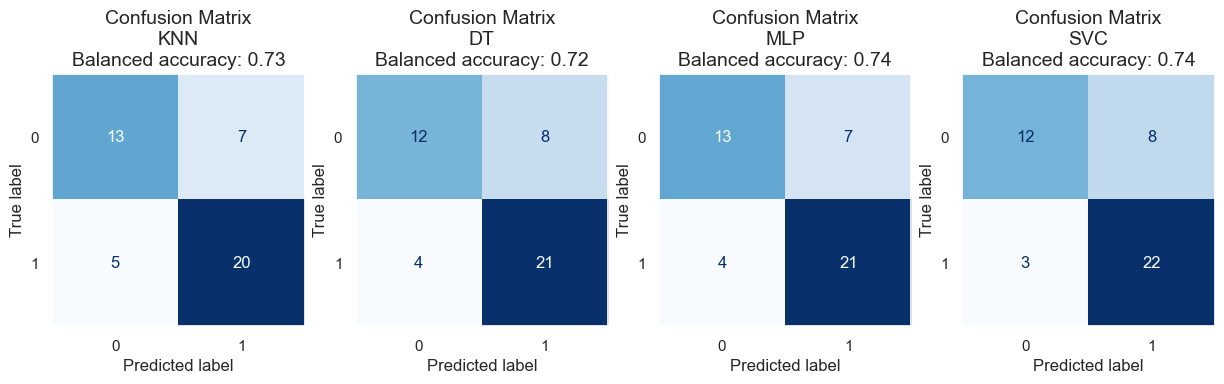

In [27]:
predictions_list = [y_pred_1, y_pred_2, y_pred_3, y_pred_4]
model_names = ["KNN", "DT", "MLP", "SVC"]

plot_confusion_matrices(y_test, predictions_list, model_names)

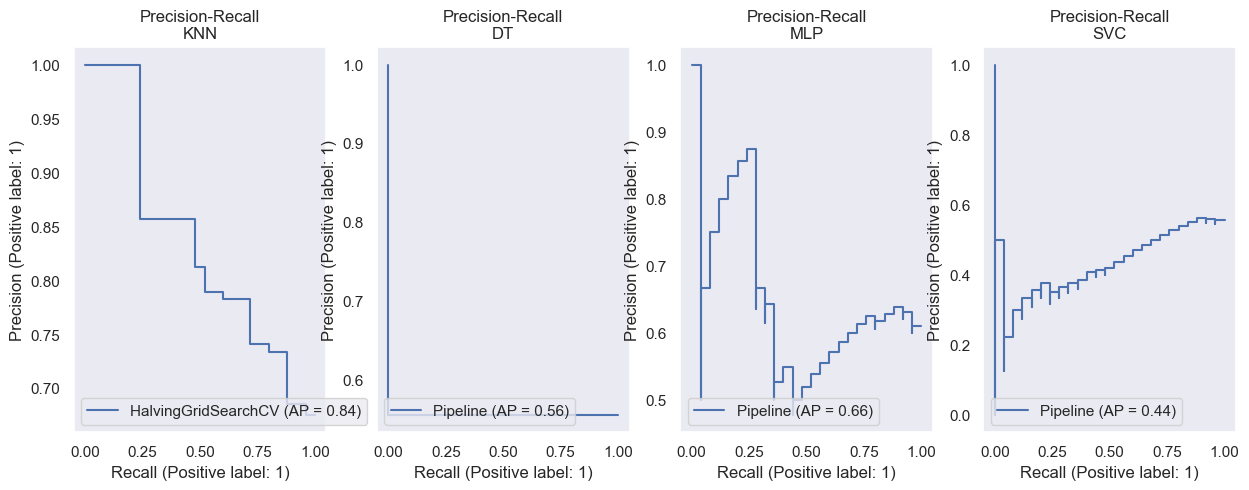

In [28]:
models_list = [model_1, model_2, model_3, model_4]
model_names = ["KNN", "DT", "MLP", "SVC"]

plot_precision_recall(models_list, X_test_scaled, y_test, model_names)

Now that we have reached the end of our prototyping, here are some last questions for you to consider while observing the visualizations above:

- Which model shows the highest accuracy?
- Is the accuracy satisfactory to invest already in the mobile app planned by the WHO?
- Would you like to collect additional data?
- Is the time required for computing predictions fast enough?
- What recommendations will you make when you present your results to the stakeholders?

Use these questions to uncover the hidden story behind the data you just analyzed and inform WHO on whether they should move forward with their diabetes app, or not, or what they could do to reach their goal. Don’t skip this activity, as it will be used during Milestone 8, as well as being a training before the exercise below. 😉

#### Exercise:

Now it's time to put your new skills to practice with some exciting applications!

Your challenge is to create a prototype in a new Jupyter Notebook called `Prototype.ipynb` to answer the same questions that we tried to answer in this notebook, but with the Hepatitis dataset.
Imagine that the **use case** is the very same as the one described at the beginning of the notebook for the WHO Diabetes app, but now for a Hepatitis app.

Make sure you pre-process your data and optimize multiple models to be sure you are extracting as much value from your data as possible.
Once you are ready with your data analysis and your prototype, evaluate whether you were able to obtain **actionable insights** that would allow you to propose the next steps to the stakeholders when you present your results to them.

The new **Hepatitis dataset** is in the same ZIP file in the `/data/datasets` directory and is also related to a medical study trying to predict whether someone has contracted hepatitis based on various measurements.
We provide you with links to the scientific [article](https://www.researchgate.net/profile/Mahmoud-Nasr-3/publication/323130913_A_novel_model_based_on_non_invasive_methods_for_prediction_of_liver_fibrosis/links/5e27008ca6fdcc70a13dbfcb/A-novel-model-based-on-non-invasive-methods-for-prediction-of-liver-fibrosis.pdf). and its corresponding full [dataset](https://archive.ics.uci.edu/ml/datasets/Hepatitis+C+Virus+%28HCV%29+for+Egyptian+patients), but it's not mandatory to read them in detail, as the relevant information for the exercise is contained in the following two files.
First, open them in a text editor or a spreadsheet and inspect their content to familiarize yourself with the file structure:
- `../data/datasets/hepatitis.csv`: This file has measurements.
- `../data/datasets/hepatitis-discretization-criteria.csv`: This file has a description of how the values are discretized by experts.

The target feature is `Baseline Histological Staging` and has 4 categorical values (1, 2, 3, and 4).
In order to create your labels, load the data in a Pandas data frame and create a new `Labels` column.
The label should be 0 when the target feature is 1 or 2, and 1 when the target feature is 3 or 4.
All other features in the dataset are input features.

Feel free to imagine other business scenarios making use of the same hepatitis dataset. Just remember to explain what the end goal of your model is, and justify the interpretation and actionable insights you make.

Enjoy creating your first ML prototype!